# Lesson 7: Classification

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

We will use the Kaggle Titanic data to demonstrate these major steps.
- Data: https://www.kaggle.com/competitions/titanic/data
- Examples used to compose this notebook: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [2]:
# Import data from Kaggle Competition
PATH = "./data/titanic"
df = pd.read_csv(os.path.join(PATH, "train.csv"), index_col=0)
df.drop(["Cabin"], axis=1, inplace=True)  # –í–∏–¥–∞–ª—è—î –∑—ñ DataFrame 'df' —Å—Ç–æ–≤–ø–µ—Ü—å –∑ –Ω–∞–∑–≤–æ—é "Cabin"
df.dropna(subset=["Embarked"], inplace=True)  # –í–∏–¥–∞–ª—è—î –∑ DataFrame –≤—Å—ñ —Ä—è–¥–∫–∏, —É —è–∫–∏—Ö —É —Å—Ç–æ–≤–ø—Ü—ñ 'Embarked' —î –ø—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è (NaN)

df

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Embarked  
PassengerId                                                    
1                1      0         A/5 21171   7.2500        S  
2                1      0          PC 17599  71.2833        C  
3                0      0  STON/O2. 3101282   7.9250        S  
4                1      0            113803  53.1000        S  
5                0      0            373450   8.0500        S  
...            ...    ...               ...      ...      ...  
887              0      0            211536  13.0000        S  
888              0      0            112053  30.0000        S  
889              1      2        W./C. 6607  23.4500        S  
890              0      0            111369  30.0000        C  
891              0      0            370376   7.7500        Q  

[889 rows x 10 columns]

In [3]:
# train-test-split
df_train, df_test = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
combine = [df_train, df_test]

df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

In [4]:
for dataset in combine:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  755 non-null    int64  
 1   Pclass    755 non-null    int64  
 2   Name      755 non-null    object 
 3   Sex       755 non-null    object 
 4   Age       602 non-null    float64
 5   SibSp     755 non-null    int64  
 6   Parch     755 non-null    int64  
 7   Ticket    755 non-null    object 
 8   Fare      755 non-null    float64
 9   Embarked  755 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  134 non-null    int64  
 1   Pclass    134 non-null    int64  
 2   Name      134 non-null    object 
 3   Sex       134 non-null    object 
 4   Age       110 non-nu

In [5]:
# perform data preprocessing separately on each subset:
# 1) converting male and female to 0 and 1
# 2) imputing age based on median value for given class and sex
# 3) converting embarked in S to 0, embarked in C to 1, and embarked in Q to 2

for dataset in combine:

    # convert categorical features into numbers
    # 'Sex': 'female' -> 1, 'male' -> 0, —Ç–∏–ø –∑–º—ñ–Ω—é—î–º–æ –Ω–∞ int
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    # 'Embarked': 'S' -> 0, 'C' -> 1, 'Q' -> 2, —Ç–µ–∂ –ø–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ —É int
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

    # fill the missing values for Age
    # —Å—Ç–≤–æ—Ä—é—î–º–æ –º–∞—Ç—Ä–∏—Ü—é 2x3 –¥–ª—è –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è –º–µ–¥—ñ–∞–Ω –≤—ñ–∫—É:
    # 2 —Å—Ç–∞—Ç—ñ (0 —ñ 1), 3 –∫–ª–∞—Å–∏ (1, 2, 3)
    guess_ages = np.zeros((2,3))
    for i in range(0, 2):  # –ø–æ —Å—Ç–∞—Ç—ñ (0 - male, 1 - female)
        for j in range(0, 3):  # –ø–æ –∫–ª–∞—Å—É (1, 2, 3)
            # –±–µ—Ä–µ–º–æ –≤—Å—ñ –≤—ñ–∫–∏ –¥–ª—è –ø–∞—Å–∞–∂–∏—Ä—ñ–≤ –∑ –ø–µ–≤–Ω–æ—é —Å—Ç–∞—Ç—Ç—é —ñ –∫–ª–∞—Å–æ–º, –ø—Ä–æ–ø—É—Å–∫–∏ –≤–∏–∫–ª—é—á–∞—î–º–æ
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            # —Ä–∞—Ö—É—î–º–æ –º–µ–¥—ñ–∞–Ω—É –≤—ñ–∫—É –¥–ª—è –∫–æ–∂–Ω–æ—ó –≥—Ä—É–ø–∏ (—Å—Ç–∞—Ç—å + –∫–ª–∞—Å)
            guess_ages[i,j] = guess_df.median()
    print('********')
    print(guess_ages)
    # —Ç–µ–ø–µ—Ä –∑–∞–ø–æ–≤–Ω—é—î–º–æ –ø—Ä–æ–ø—É—Å–∫–∏ –≤—ñ–∫—É —É –∫–æ–∂–Ω—ñ–π –≥—Ä—É–ø—ñ –º–µ–¥—ñ–∞–Ω–æ—é, —è–∫—É —Ä–∞–Ω—ñ—à–µ –ø–æ—Ä–∞—Ö—É–≤–∞–ª–∏
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    # –ø–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ —Å—Ç–æ–≤–ø–µ—Ü—å 'Age' —É —Ü—ñ–ª–∏–π —Ç–∏–ø
    dataset['Age'] = dataset['Age'].astype(int)

********
[[43.  30.  25. ]
 [35.  29.  21.5]]
********
[[36.  30.  26.5]
 [30.  22.5 21.5]]


In [6]:
for dataset in combine:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  755 non-null    int64  
 1   Pclass    755 non-null    int64  
 2   Name      755 non-null    object 
 3   Sex       755 non-null    int64  
 4   Age       755 non-null    int64  
 5   SibSp     755 non-null    int64  
 6   Parch     755 non-null    int64  
 7   Ticket    755 non-null    object 
 8   Fare      755 non-null    float64
 9   Embarked  755 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  134 non-null    int64  
 1   Pclass    134 non-null    int64  
 2   Name      134 non-null    object 
 3   Sex       134 non-null    int64  
 4   Age       134 non-nu

In [7]:
# drop columns that are irrelevant for prediction

for dataset in combine:
    dataset.drop("Name", axis=1, inplace=True)
    dataset.drop("Ticket", axis=1, inplace=True)

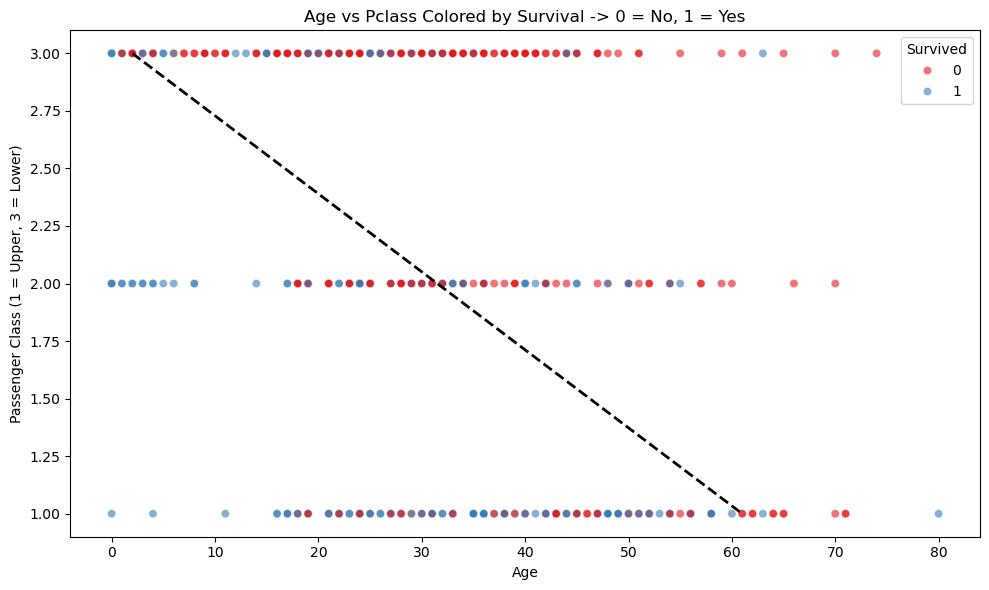

In [8]:
# Create a new figure and axis to avoid overlapping previous plots (optional but good practice)
plt.figure(figsize=(10, 6))

# Scatterplot: visualize Age vs Pclass, with color indicating survival (0 = did not survive, 1 = survived)
sns.scatterplot(
    x="Age",
    y="Pclass",
    hue="Survived",
    data=df_train[["Age", "Pclass", "Survived"]],
    palette="Set1",  # Optional: clearer color palette
    alpha=0.6,  # Optional: slight transparency for overlapping points
)

# Lineplot: draw a line to represent a visual "boundary" or trend
# This line goes from Age=2.0, Pclass=3.0 to Age=61.0, Pclass=1.0
sns.lineplot(
    x=np.array([2.0, 61.0]),
    y=np.array([3.0, 1.0]),
    color="black",  # Make the line stand out
    linestyle="--",  # Dashed line style
    linewidth=2,  # Thicker line
)

# Add labels and title for clarity
plt.title("Age vs Pclass Colored by Survival -> 0 = No, 1 = Yes")
plt.xlabel("Age")
plt.ylabel("Passenger Class (1 = Upper, 3 = Lower)")
plt.legend(title="Survived")

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# create features
X_train = df_train[["Age", "Pclass"]]
y_train = df_train["Survived"]
X_test  = df_test[["Age", "Pclass"]]
y_test = df_test["Survived"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((755, 2), (755,), (134, 2), (134,))

## Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log
# score - –≤—ñ–¥—Å–æ—Ç–æ–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–∏—Ö –≤—ñ–¥–ø–æ–≤—ñ–¥–µ–π –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞

69.4

In [11]:
# –û–±—á–∏—Å–ª—é—î–º–æ —Ç–æ—á–Ω—ñ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç—ñ
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")

Test Accuracy: 72.39%


In [12]:
model.coef_, model.intercept_

(array([[-0.0464081 , -1.19343869]]), array([3.60349275]))

In [13]:
model.intercept_.item()

3.603492745569915

In [14]:
# f(x_1, x_2) = 0

# x_1*model.coef_[0][0] + x_2*model.coef_[0][1] + model.intercept_.item() = 0
# x_1*model.coef_[0][0] + x_2*model.coef_[0][1] = - model.intercept_.item()
# x_1*(-0.0464081) = - (x_2*(-1.19343869)) - 3.603492745569915

# when x_1 = 0:
# x_2*1.19343869 - 3.603492745569915 = 0
# x_2*1.19343869 = 3.603492745569915
x_2_when_x_1_0 = 3.603492745569915/1.19343869
x_2_when_x_1_0

3.019420080615884

In [15]:
# when x_2 = 0:
#x_1*-0.0464081 = -3.603492745569915
x_1_when_x_2_0 = -3.603492745569915/-0.0464081
x_1_when_x_2_0

77.64792666732563

<Axes: xlabel='Age', ylabel='Pclass'>

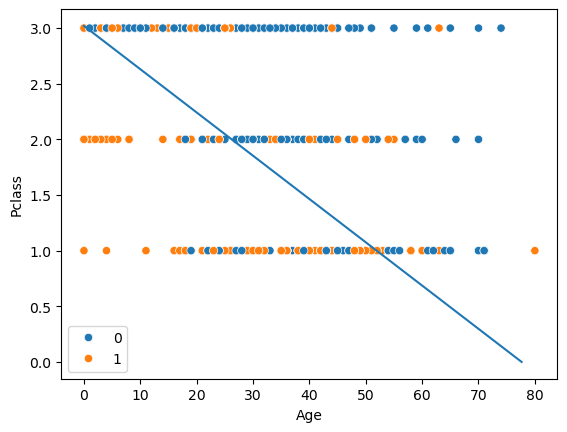

In [16]:
sns.scatterplot(x='Age', y='Pclass', hue="Survived", data=df_train[["Age", "Pclass", "Survived"]])
sns.lineplot(x=np.array([0.0, x_1_when_x_2_0]), y=np.array([x_2_when_x_1_0, 0.0]))
#sns.lineplot(x=np.array([2.0, 44.0]), y=np.array([3.0, 1.0]))
#sns.lineplot(x=np.array([2.0, 61.0]), y=np.array([3.0, 1.0]))

In [17]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ["Feature"]
coeff_df["Covariation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by="Covariation", ascending=False)

Feature  Covariation
0     Age    -0.046408
1  Pclass    -1.193439

In [18]:
# –ö–æ—Ä–µ–ª—è—Ü—ñ—è –≤—Å—ñ—Ö —á–∏—Å–ª–æ–≤–∏—Ö –æ–∑–Ω–∞–∫ –∑ Survived
correlation = df_train.corr(numeric_only=True)["Survived"].sort_values(ascending=False)
print(correlation)

Survived    1.000000
Sex         0.533187
Fare        0.244274
Embarked    0.094931
Parch       0.072032
SibSp      -0.044677
Age        -0.063430
Pclass     -0.326510
Name: Survived, dtype: float64


In [19]:
# add more features
X_train_df = df_train.drop("Survived", axis=1)
X_train = X_train_df.to_numpy()
y_train = df_train["Survived"]
X_test_df = df_test.drop("Survived", axis=1)
X_test  = df_test.drop("Survived", axis=1).to_numpy()
y_test = df_test["Survived"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((755, 7), (755,), (134, 7), (134,))

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log
# score - –≤—ñ–¥—Å–æ—Ç–æ–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–∏—Ö –≤—ñ–¥–ø–æ–≤—ñ–¥–µ–π –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞

80.4

In [21]:
# x_1*model.coef_[0][0] + x_2*model.coef_[0][1] + x_3*model.coef_[0][2] + ... + model.intercept_.item() = 0

In [22]:
coeff_df = pd.DataFrame(X_train_df.columns)
coeff_df.columns = ['Feature']
coeff_df["Covariation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Covariation', ascending=False)

Feature  Covariation
1       Sex     2.539042
6  Embarked     0.196484
5      Fare     0.001283
4     Parch    -0.043163
2       Age    -0.047143
3     SibSp    -0.365092
0    Pclass    -1.247458

In [23]:
# take one test example
for feature_name, feature in zip(X_test_df.columns, X_test[0]):
    print(feature_name, feature)

Pclass 3.0
Sex 0.0
Age 28.0
SibSp 0.0
Parch 0.0
Fare 7.8542
Embarked 0.0


In [24]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0])

In [25]:
# take another test example
for feature_name, feature in zip(X_train_df.columns, X_test[1]):
    print(feature_name, feature)

Pclass 1.0
Sex 1.0
Age 14.0
SibSp 1.0
Parch 2.0
Fare 120.0
Embarked 0.0


In [26]:
# probabilities
model.predict_proba(X_test)

array([[0.89928566, 0.10071434],
       [0.03927269, 0.96072731],
       [0.30038276, 0.69961724],
       [0.73682617, 0.26317383],
       [0.03482768, 0.96517232],
       [0.8950408 , 0.1049592 ],
       [0.68865114, 0.31134886],
       [0.86509542, 0.13490458],
       [0.09564956, 0.90435044],
       [0.04422009, 0.95577991],
       [0.58730777, 0.41269223],
       [0.45425994, 0.54574006],
       [0.96354832, 0.03645168],
       [0.90509495, 0.09490505],
       [0.90329333, 0.09670667],
       [0.89756747, 0.10243253],
       [0.68431015, 0.31568985],
       [0.86981726, 0.13018274],
       [0.77862032, 0.22137968],
       [0.89041357, 0.10958643],
       [0.72035506, 0.27964494],
       [0.05909465, 0.94090535],
       [0.9474384 , 0.0525616 ],
       [0.46246141, 0.53753859],
       [0.89039426, 0.10960574],
       [0.50953278, 0.49046722],
       [0.75325965, 0.24674035],
       [0.09289527, 0.90710473],
       [0.5068014 , 0.4931986 ],
       [0.69934328, 0.30065672],
       [0.

In [27]:
# prob - see formula
# prob = 1 / (1 + math.e**-z)
import math

math.e

2.718281828459045

In [28]:
z = 1
1 / (1 + math.e**z)

0.2689414213699951

In [29]:
z = 2
1 / (1 + math.e**z)

0.11920292202211757

In [30]:
z = 3
1 / (1 + math.e**z)

0.04742587317756679

In [31]:
z = -1
1 / (1 + math.e**z)

0.7310585786300049

In [32]:
z = -2
1 / (1 + math.e**z)

0.8807970779778823

In [33]:
z = -3
1 / (1 + math.e**z)

0.9525741268224331

In [34]:
math.e**-1  # inverse
1 / math.e

0.36787944117144233

In [35]:
math.e**-2  # inverse
# 1 / math.e / math.e  
1 / (math.e * math.e)

0.1353352832366127

In [36]:
z = -10
math.e**-z

22026.465794806703

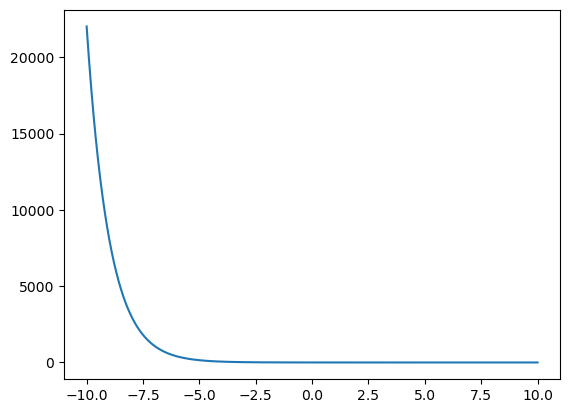

In [37]:
x = np.linspace(-10, 10, 100000)
y = math.e**-x
 
fig = plt.figure()
# Create the plot
plt.plot(x, y)

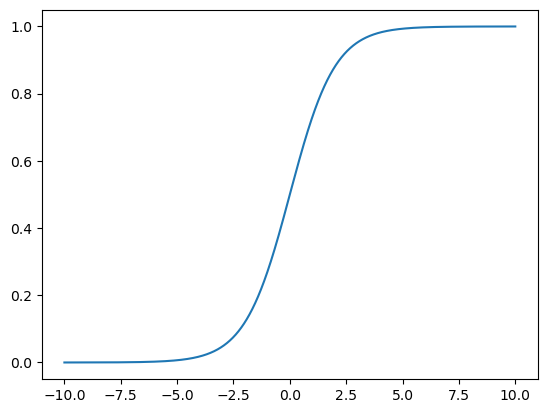

In [38]:
x = np.linspace(-10, 10, 100000)
y = 1 / (1 + math.e**-x)
 
fig = plt.figure()
# Create the plot
plt.plot(x, y)

In [39]:
#y = 1 / (math.e**-1 + 1)
y = 1 / (math.e**5.0 + 1)

y

0.006692850924284857

In [40]:
# Loss function

probs = model.predict_proba(X_test)
probs

array([[0.89928566, 0.10071434],
       [0.03927269, 0.96072731],
       [0.30038276, 0.69961724],
       [0.73682617, 0.26317383],
       [0.03482768, 0.96517232],
       [0.8950408 , 0.1049592 ],
       [0.68865114, 0.31134886],
       [0.86509542, 0.13490458],
       [0.09564956, 0.90435044],
       [0.04422009, 0.95577991],
       [0.58730777, 0.41269223],
       [0.45425994, 0.54574006],
       [0.96354832, 0.03645168],
       [0.90509495, 0.09490505],
       [0.90329333, 0.09670667],
       [0.89756747, 0.10243253],
       [0.68431015, 0.31568985],
       [0.86981726, 0.13018274],
       [0.77862032, 0.22137968],
       [0.89041357, 0.10958643],
       [0.72035506, 0.27964494],
       [0.05909465, 0.94090535],
       [0.9474384 , 0.0525616 ],
       [0.46246141, 0.53753859],
       [0.89039426, 0.10960574],
       [0.50953278, 0.49046722],
       [0.75325965, 0.24674035],
       [0.09289527, 0.90710473],
       [0.5068014 , 0.4931986 ],
       [0.69934328, 0.30065672],
       [0.

In [41]:
1 - 0.89931387

0.10068613000000004

In [42]:
probs_1 = probs[:, 1]
probs_1

array([0.10071434, 0.96072731, 0.69961724, 0.26317383, 0.96517232,
       0.1049592 , 0.31134886, 0.13490458, 0.90435044, 0.95577991,
       0.41269223, 0.54574006, 0.03645168, 0.09490505, 0.09670667,
       0.10243253, 0.31568985, 0.13018274, 0.22137968, 0.10958643,
       0.27964494, 0.94090535, 0.0525616 , 0.53753859, 0.10960574,
       0.49046722, 0.24674035, 0.90710473, 0.4931986 , 0.30065672,
       0.58445372, 0.7450848 , 0.10960574, 0.5414936 , 0.03671903,
       0.39515128, 0.70511994, 0.69413623, 0.13039845, 0.10960574,
       0.14589764, 0.53149796, 0.33191551, 0.10958643, 0.51168222,
       0.49151901, 0.78692815, 0.11901706, 0.22826915, 0.90622608,
       0.92584018, 0.76260585, 0.12937145, 0.11527557, 0.90687988,
       0.88541762, 0.42802464, 0.06251479, 0.16495067, 0.26255213,
       0.33664174, 0.48747156, 0.77798256, 0.16500076, 0.83858352,
       0.38608054, 0.03819108, 0.106511  , 0.90122795, 0.96472137,
       0.29150055, 0.97819079, 0.6898411 , 0.10516283, 0.40606

In [ ]:
# Binary cross entropy: https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/

In [43]:
condition = probs_1 > 0.5
# probability of survival for surviving group
probs_1[condition]

array([0.96072731, 0.69961724, 0.96517232, 0.90435044, 0.95577991,
       0.54574006, 0.94090535, 0.53753859, 0.90710473, 0.58445372,
       0.7450848 , 0.5414936 , 0.70511994, 0.69413623, 0.53149796,
       0.51168222, 0.78692815, 0.90622608, 0.92584018, 0.76260585,
       0.90687988, 0.88541762, 0.77798256, 0.83858352, 0.90122795,
       0.96472137, 0.97819079, 0.6898411 , 0.78313935, 0.82282994,
       0.57123252, 0.95150332, 0.87962648, 0.7450848 , 0.65365285,
       0.70048297, 0.97528925, 0.52237952, 0.59795797, 0.96794392,
       0.68262772, 0.90080555, 0.56497388, 0.94584747, 0.96110203,
       0.93619711, 0.53753859, 0.88315366, 0.7450848 , 0.82540998])

In [44]:
# probability of survival for non-surviving group
probs_1[~condition]

array([0.10071434, 0.26317383, 0.1049592 , 0.31134886, 0.13490458,
       0.41269223, 0.03645168, 0.09490505, 0.09670667, 0.10243253,
       0.31568985, 0.13018274, 0.22137968, 0.10958643, 0.27964494,
       0.0525616 , 0.10960574, 0.49046722, 0.24674035, 0.4931986 ,
       0.30065672, 0.10960574, 0.03671903, 0.39515128, 0.13039845,
       0.10960574, 0.14589764, 0.33191551, 0.10958643, 0.49151901,
       0.11901706, 0.22826915, 0.12937145, 0.11527557, 0.42802464,
       0.06251479, 0.16495067, 0.26255213, 0.33664174, 0.48747156,
       0.16500076, 0.38608054, 0.03819108, 0.106511  , 0.29150055,
       0.10516283, 0.40606489, 0.14621109, 0.07445062, 0.38892337,
       0.17179843, 0.15417925, 0.05469636, 0.33191551, 0.11418805,
       0.10960574, 0.08861603, 0.12929257, 0.08127633, 0.11582248,
       0.10958643, 0.2195206 , 0.18817386, 0.15417925, 0.11416209,
       0.08492532, 0.07301103, 0.0523412 , 0.15306306, 0.13487026,
       0.14068525, 0.04367728, 0.11231764, 0.10658252, 0.10342

In [45]:
# probability of non-survival for non-surviving group
1 - probs_1[~condition]

array([0.89928566, 0.73682617, 0.8950408 , 0.68865114, 0.86509542,
       0.58730777, 0.96354832, 0.90509495, 0.90329333, 0.89756747,
       0.68431015, 0.86981726, 0.77862032, 0.89041357, 0.72035506,
       0.9474384 , 0.89039426, 0.50953278, 0.75325965, 0.5068014 ,
       0.69934328, 0.89039426, 0.96328097, 0.60484872, 0.86960155,
       0.89039426, 0.85410236, 0.66808449, 0.89041357, 0.50848099,
       0.88098294, 0.77173085, 0.87062855, 0.88472443, 0.57197536,
       0.93748521, 0.83504933, 0.73744787, 0.66335826, 0.51252844,
       0.83499924, 0.61391946, 0.96180892, 0.893489  , 0.70849945,
       0.89483717, 0.59393511, 0.85378891, 0.92554938, 0.61107663,
       0.82820157, 0.84582075, 0.94530364, 0.66808449, 0.88581195,
       0.89039426, 0.91138397, 0.87070743, 0.91872367, 0.88417752,
       0.89041357, 0.7804794 , 0.81182614, 0.84582075, 0.88583791,
       0.91507468, 0.92698897, 0.9476588 , 0.84693694, 0.86512974,
       0.85931475, 0.95632272, 0.88768236, 0.89341748, 0.89657

https://www.mathsisfun.com/algebra/logarithms.html

# üìò Logistic Regression: Log-Likelihood & Binary Cross-Entropy

## üî¢ 1. General Likelihood

Let:

- $\hat{y}^{(i)}$ ‚Äî predicted probability that the example belongs to class 1  
- $\hat{y}{(i)} \in \{0, 1\}$ ‚Äî actual class label (0 or 1)

Then the total likelihood of the model making correct predictions on the dataset is:

$$
P(X) = \prod_{i=1}^{m} \left( \hat{y}^{(i)} \right)^{y^{(i)}} \cdot \left( 1 - \hat{y}^{(i)} \right)^{1 - y^{(i)}}
$$

---

## üßÆ 2. Log-Likelihood

To avoid numerical underflow (due to multiplying many small probabilities), take the natural logarithm:

$$
\ln(P(X)) = \sum_{i=1}^{m^+} \ln\left( \hat{y}^{(i)} \right) + \sum_{i=1}^{m^-} \ln\left( 1 - \hat{y}^{(i)} \right)
$$

$$
\log P(X) = \sum_{i=1}^{m} \left[ y^{(i)} \cdot \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \cdot \log(1 - \hat{y}^{(i)}) \right]
$$

This is called the **log-likelihood**.

---

## ‚ùå 3. Loss Function ‚Äî Negative Log-Likelihood

In practice, we minimize the negative log-likelihood, which becomes the **binary cross-entropy loss**:

$$
\mathcal{L} = - \sum_{i=1}^{m} \left[ y^{(i)} \cdot \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \cdot \log(1 - \hat{y}^{(i)}) \right]
$$


In [49]:
# probability of survival for surviving group * probability of non-survival for non-surviving group
(np.prod(probs_1[condition]))*(np.prod(1 - probs_1[~condition]))

np.float64(1.520169188986794e-14)

In [71]:
-(np.sum(np.log(probs_1[condition])))+(np.sum(np.log(1 - probs_1[~condition])))

np.float64(-5.388910529486374)

In [51]:
y_test_array = y_test.to_numpy()
y_test_array

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0])

In [73]:
probs[0][1]*0

np.float64(0.0)

In [52]:
probs[1][1]*1

np.float64(0.9607273107802655)

In [75]:
condition

array([False,  True,  True, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True,  True,

In [74]:
condition[0]

np.False_

In [53]:
condition[1]

np.True_

In [76]:
(1-0)*probs[0][1]

np.float64(0.10071434322592744)

### Binary Cross-Entropy Loss (Negative Log-Likelihood)
$$
- \sum_{i=1}^m \left[ y^{(i)} \log \left( \hat{p}^{(i)} \right) + (1 - y^{(i)}) \log \left( 1 - \hat{p}^{(i)} \right) \right]
$$

In [55]:
# rewrite the formula
-np.sum(y_test_array*np.log(probs)[:, 1] + (1 - y_test_array)*(np.log(1 - (probs)[:, 1])))

np.float64(56.3592437202921)

### Average Binary Cross-Entropy Loss Using Both Classes

$$
\mathcal{L} = - \frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log \left( \hat{p}_1^{(i)} \right) + (1 - y^{(i)}) \log \left( \hat{p}_0^{(i)} \right) \right]
$$

In [72]:
# probability of survival for surviving group + probability of non-survival for non-surviving group
-np.sum(y_test_array*np.log(probs)[:, 1] + (1 - y_test_array)*np.log(probs)[:, 0]) / len(probs)

np.float64(0.420591371046956)

In [57]:
from sklearn.metrics import log_loss
log_loss(y_test, probs)#, normalize=False)

0.420591371046956

In [58]:
# probability of non-survival for non-surviving group
#y_test_array*np.log(probs)[:, 1]

In [59]:
# probability of non-survival for non-surviving group
(1-y_test.to_numpy())*(1-np.log(probs)[:, 1])

array([3.29546705, 0.        , 0.        , 2.33494053, 0.        ,
       0.        , 2.16684126, 3.00318754, 0.        , 0.        ,
       1.88505318, 0.        , 4.31176765, 3.35487836, 3.33607295,
       3.27855095, 2.15299505, 3.03881614, 2.50787605, 3.21104176,
       2.27423455, 0.        , 3.94576945, 1.62075473, 3.21086555,
       1.71239684, 2.39941871, 0.        , 1.70684335, 2.20178614,
       0.        , 0.        , 3.21086555, 1.61342403, 4.30446018,
       1.92848659, 0.        , 0.        , 3.0371605 , 3.21086555,
       2.92484998, 1.63205591, 2.10287483, 3.21104176, 0.        ,
       0.        , 1.23961833, 3.12848846, 2.47722987, 0.        ,
       0.        , 0.        , 3.04506755, 3.16042973, 0.        ,
       0.        , 1.84857452, 3.77235218, 2.80210882, 2.33730564,
       0.        , 1.71852333, 0.        , 2.80180521, 0.        ,
       1.95170927, 4.26515318, 3.239507  , 0.        , 0.        ,
       2.23271338, 1.02205055, 1.371294  , 0.        , 0.     

In [60]:
# Logarithms: https://www.mathsisfun.com/algebra/logarithms.html
math.log(8, 2)

3.0

In [61]:
math.e ** 2.0794

7.999667673464062

In [62]:
math.log(8, math.e) == math.log(8)

True

## Other classification models

In [63]:
# Stochastic Gradient Descent

sgd = SGDClassifier(loss="log_loss")  # logistic regression
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd
# score - –≤—ñ–¥—Å–æ—Ç–æ–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–∏—Ö –≤—ñ–¥–ø–æ–≤—ñ–¥–µ–π –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞

73.64

Gradient Descent
![gradient_descent](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*N5WjbzwsCFse-KPjBWZZ6g.jpeg)
![gradient_descent_complex](https://miro.medium.com/v2/resize:fit:900/format:webp/1*jeMxJLZz-o5xniDMKqcTAg.jpeg)

In [64]:
probs_sgd = sgd.predict_proba(X_test)
log_loss(y_test, probs_sgd)

10.571482313722598

In [65]:
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
Y_pred = ridge.predict(X_test)
acc_ridge = round(ridge.score(X_train, y_train) * 100, 2)
acc_ridge

79.87

## Multi-class classification

In [66]:
# –°—Ç—Ä–∞—Ç–µ–≥—ñ—è "–æ–¥–∏–Ω –ø—Ä–æ—Ç–∏ –≤—Å—ñ—Ö"
from sklearn.multiclass import OneVsRestClassifier
# create features
X_train = df_train[["Age", "Survived"]]
y_train = df_train["Pclass"]
X_test  = df_test[["Age", "Survived"]]
y_test = df_test["Pclass"]

clf = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train)
preds_3 = clf.predict(X_test)
preds_3

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3,
       3, 3])

In [67]:
y_test.to_numpy()

array([3, 1, 3, 2, 1, 3, 2, 3, 1, 1, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 1, 3, 1, 2, 2, 1, 2, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3,
       1, 1, 2, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       3, 3, 1, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3,
       3, 1, 3, 1, 3, 3, 2, 2, 3, 3, 2, 1, 3, 3, 1, 1, 1, 1, 3, 1, 2, 2,
       2, 3])

In [68]:
"Train", clf.score(X_train, y_train), "Test", clf.score(X_test, y_test)

('Train', 0.6556291390728477, 'Test', 0.6119402985074627)

In [69]:
# –°—Ç—Ä–∞—Ç–µ–≥—ñ—è "–æ–¥–∏–Ω –ø—Ä–æ—Ç–∏ –æ–¥–Ω–æ–≥–æ"

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

clf = OneVsOneClassifier(
    LogisticRegression(random_state=0)).fit(X_train, y_train)

preds_3 = clf.predict(X_test)
preds_3

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3,
       3, 3])

In [70]:
"Train", clf.score(X_train, y_train), "Test", clf.score(X_test, y_test)

('Train', 0.6569536423841059, 'Test', 0.6119402985074627)